<a href="https://colab.research.google.com/github/darstech/ML-Foundation/blob/main/notebooks/single_point_regression_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: [John Krohn Github](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/single-point-regression-gradient.ipynb)

# Gradient of a Single-Point Regression

In this notebook, we calculate the gradient of quadratic cost with respect to a straight-line regression model's parameters. We keep the partial derivatives as simple as possible by limiting the model to handling a single data point. 

In [ ]:
import torch

In [ ]:
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

The slope of a line is given by $y = mx + b$:

In [ ]:
def regression(my_x, my_m, my_b):
  return my_m*my_x + my_b

Let's initialize $m$ and $b$ with the same "random" near-zero values as we did in the *Regression in PyTorch* notebook: 

In [48]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

Let's initialize $m$ and $b$ with the same "random" near-zero values as we did in the *Regression in PyTorch* notebook: 

In [49]:
i = 7
x = xs[i]
y = ys[i]

In [50]:
x

tensor(7.)

In [51]:
y

tensor(-1.3700)

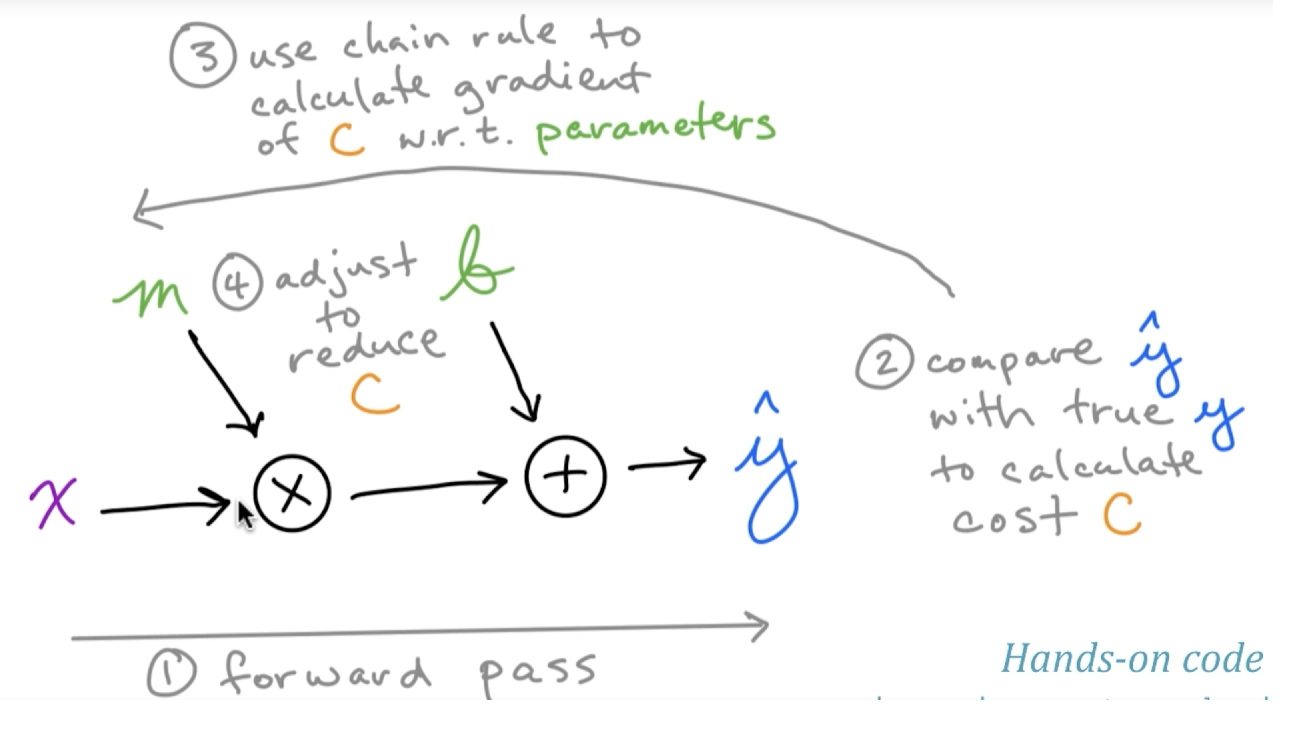

**Step 1**: Forward pass

We can flow the scalar tensor $x$ through our regression model to produce $\hat{y}$, an estimate of $y$. Prior to any model training, this is an arbitrary estimate:

In [52]:
yhat = regression(x, m, b)
yhat

tensor([6.4000], grad_fn=<AddBackward0>)

**Step 2**: Compare $\hat{y}$ with true $y$ to calculate cost $C$

In the *Regression in PyTorch* notebook, we used mean-squared error, which averages quadratic cost over multiple data points. With a single data point, here we can use quadratic cost alone. It is defined by: $$ C = (\hat{y} - y)^2 $$

**Note: Squaring is done for two reasons:**

$Reason: 1.$   Cost is always positive

$Reason: 2.$   Larger differences b/w yhat & y are associated with exponentially increasing cost



In [53]:
def squared_error(my_yhat, my_y):
  return (my_yhat - my_y)**2

In [54]:
C = squared_error(yhat, y)
C

tensor([60.3729], grad_fn=<PowBackward0>)

**Step 3**: Use autodiff to calculate gradient of $C$ w.r.t. parameters

In [55]:
C.backward()

The partial derivative of $C$ with respect to $m$ ($\frac{\partial C}{\partial m}$) is: 

In [56]:
m.grad

tensor([108.7800])

And the partial derivative of $C$ with respect to $b$ ($\frac{\partial C}{\partial b}$) is: 

In [57]:
b.grad

tensor([15.5400])

$$ \frac{\partial C}{\partial m} = 2x(\hat{y} - y) $$

In [58]:
2 * x * (yhat.item() - y)

tensor(108.7800)

$$ \frac{\partial C}{\partial b} = 2(\hat{y}-y) $$

In [59]:
2 * (yhat.item() - y)

tensor(15.5400)

### The Gradient of Cost, $\nabla C$

The gradient of cost, which is symbolized $\nabla C$ (pronounced "nabla C"), is a vector of all the partial derivatives of $C$ with respect to each of the individual model parameters: 

$\nabla C = \nabla_p C = \left[ \frac{\partial{C}}{\partial{p_1}}, \frac{\partial{C}}{\partial{p_2}}, \cdots, \frac{\partial{C}}{\partial{p_n}} \right]^T $

In this case, there are only two parameters, $b$ and $m$: 

$\nabla C = \left[ \frac{\partial{C}}{\partial{b}}, \frac{\partial{C}}{\partial{m}} \right]^T $

In [60]:
gradients = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradients

tensor([[ 15.5400],
        [108.7800]])